In [10]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy
from math import sqrt


      MeanTCperYear
Year               
1996       0.208333
1997       0.086957
1998       1.681818
1999       2.600000
2000       1.783333
2001       1.627530
2002       4.975694
2003       1.235294
2004       4.977273
2005       4.590476
2006       2.747899
2007       2.153846
2008       1.646396
2009       1.387560
2010       1.621739
2011       2.174074
2012       1.375000
2013       1.394286
2014       2.479167
2015       1.933333
2016       2.479167
2017       3.540984
2018       4.410000
2019       3.641509


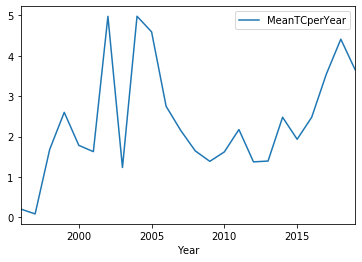

In [27]:
from matplotlib import pyplot
series = read_csv('Annual_Total_Citation_per_Year.csv', header=0, index_col=0)
print(series)
series.plot()
pyplot.show()

In [28]:
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

In [29]:
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

In [30]:
series = read_csv('Annual_Total_Citation_per_Year.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series)
# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
window = 6
model = AutoReg(train, lags=6)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))

Year
1996-01-01    0.208333
1997-01-01    0.086957
1998-01-01    1.681818
1999-01-01    2.600000
2000-01-01    1.783333
2001-01-01    1.627530
2002-01-01    4.975694
2003-01-01    1.235294
2004-01-01    4.977273
2005-01-01    4.590476
2006-01-01    2.747899
2007-01-01    2.153846
2008-01-01    1.646396
2009-01-01    1.387560
2010-01-01    1.621739
2011-01-01    2.174074
2012-01-01    1.375000
2013-01-01    1.394286
2014-01-01    2.479167
2015-01-01    1.933333
2016-01-01    2.479167
2017-01-01    3.540984
2018-01-01    4.410000
2019-01-01    3.641509
Name: MeanTCperYear, dtype: float64


Test RMSE: 1.019


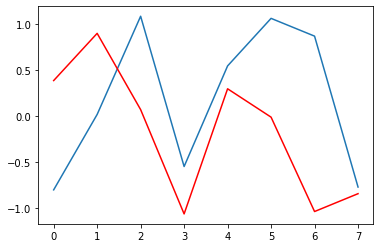

In [31]:
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [32]:
from pandas import read_csv
from statsmodels.tsa.ar_model import AutoReg
import numpy

In [33]:
# load dataset
series = read_csv('Annual_Total_Citation_per_Year.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = difference(series.values)
# fit model
model = AutoReg(X, lags=6)
model_fit = model.fit()
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

In [34]:
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
loaded = AutoRegResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[ 0.07342288 -0.55744238  0.04134447  0.17258674 -0.22143702 -0.38045653
 -0.09890414]
[3.64150943]


In [35]:
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
# load model
model = AutoRegResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 4.342005
